In [1]:
import seaborn as sns

In [2]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
y = train_data['quality']
x = train_data.drop(['quality','Id'], axis=1)
x_test = test_data.drop('Id', axis=1)

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
y = pd.DataFrame(ohe.fit_transform(y.values.reshape(-1,1)))
y.index = train_data.index

In [6]:
ohe.categories_

[array([3, 4, 5, 6, 7, 8], dtype=int64)]

In [7]:
y.shape

(2056, 6)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=11, activation='relu', input_shape=[11]),
    layers.Dense(units=66, activation='relu'),
    layers.Dense(units=6, activation='softmax')
])

In [11]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [13]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=200,
    callbacks=early_stopping
)

Epoch 1/200
10/10 [==============================] - 2s 57ms/step - loss: 1.7952 - accuracy: 0.2243 - val_loss: 1.7485 - val_accuracy: 0.3786
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 1.7144 - accuracy: 0.4054 - val_loss: 1.6699 - val_accuracy: 0.4029
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 1.6309 - accuracy: 0.4086 - val_loss: 1.5872 - val_accuracy: 0.4029
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 1.5416 - accuracy: 0.4086 - val_loss: 1.4984 - val_accuracy: 0.4029
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 1.4484 - accuracy: 0.4086 - val_loss: 1.4071 - val_accuracy: 0.4029
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 1.3555 - accuracy: 0.4135 - val_loss: 1.3237 - val_accuracy: 0.4126
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 1.2779 - accuracy: 0.4297 - val_loss: 1.2640 - val_accuracy: 0.4272
Epoch 8/200


In [14]:
result = model.predict(x_test)

43/43 [==============================] - 0s 2ms/step


In [19]:
result

array([[0.00761265, 0.04026121, 0.58477926, 0.30089667, 0.05999457,
        0.00645561],
       [0.00913853, 0.03140809, 0.47795966, 0.38626504, 0.08327812,
        0.01195051],
       [0.00927054, 0.03761156, 0.5159408 , 0.36301884, 0.0650665 ,
        0.00909177],
       ...,
       [0.00605969, 0.03953737, 0.77206254, 0.15605575, 0.02333213,
        0.00295242],
       [0.00454948, 0.02666839, 0.7601302 , 0.18455113, 0.02174917,
        0.00235158],
       [0.006469  , 0.03101171, 0.5996532 , 0.30620348, 0.05085279,
        0.00580983]], dtype=float32)

<AxesSubplot: ylabel='Count'>

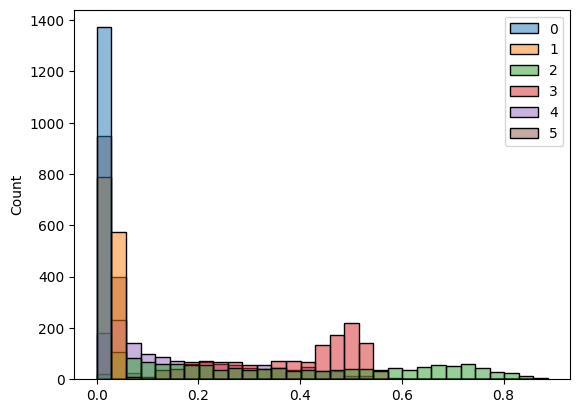

In [15]:
sns.histplot(result)

In [16]:
new_result = []
for row in result:
    new_result.append(list(row).index(max(row))+3)

<AxesSubplot: ylabel='Count'>

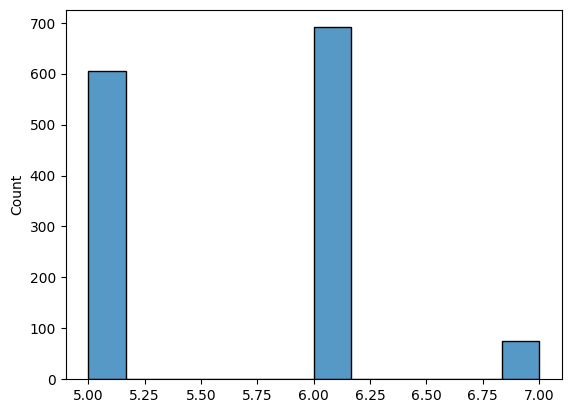

In [17]:
sns.histplot(new_result)

In [18]:
df = pd.DataFrame({'Id':test_data['Id'].values, 'quality':new_result})
df.to_csv('submission.csv', index=False)